In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [78]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('costocancer.csv')

data.head()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0.00,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0.00,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,123236.3,38552.7,47155.7,37527.8


In [13]:
data.columns =['Cancer Site', 'Year', 'Sex', 'Age',
       'Incidence and Survival Assumptions',
       'Annual Cost Increase',
       'Total Costs', 'Initial Year After Diagnosis Cost',
       'Continuing Phase Cost', 'Last Year of Life Cost']
'''
[
        'Cancer Site', 
        'Year', 
        'Sex', 
        'Age',
       'Incidence and Survival Assumptions:Supuestos de incidencia y supervivencia',
       'Annual Cost Increase (applied to initial and last phases):Incremento de costo anual (aplicado a la fase inicial y última)',
       'Total Costs', 
       'Initial Year After Diagnosis Cost:Año inicial después del costo del diagnóstico',
       'Continuing Phase Cost:Coste de la fase continua', 
       'Last Year of Life Cost:Coste del último año de vida'
       ]
       '''

"\n['Cancer Site', 'Year', 'Sex', 'Age',\n       'Incidence and Survival Assumptions',\n       'Annual Cost Increase (applied to initial and last phases)',\n       'Total Costs', 'Initial Year After Diagnosis Cost',\n       'Continuing Phase Cost', 'Last Year of Life Cost']"

In [14]:
data['Cancer Site'].value_counts()

Lung          66
Lymphoma      66
Stomach       66
Pancreas      66
Uterus        66
Other         66
Cervix        66
Head_Neck     66
Melanoma      66
Kidney        66
Colorectal    66
Ovary         66
Esophagus     66
Brain         66
AllSites      66
Prostate      66
Leukemia      66
Bladder       66
Breast        66
Name: Cancer Site, dtype: int64

In [35]:
data['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [37]:
data['Sex'].value_counts()

Both sexes    990
Females       198
Males          66
Name: Sex, dtype: int64

In [40]:
data['Age'].value_counts()

All ages    1254
Name: Age, dtype: int64

In [41]:
data['Incidence and Survival Assumptions'].value_counts()

Incidence, Survival follow recent trends             627
Survival follows recent trend, Incidence constant    209
Incidence follows recent trend, Survival constant    209
Incidence, Survival at constant rate                 209
Name: Incidence and Survival Assumptions, dtype: int64

In [43]:
data['Annual Cost Increase'].unique()

array([0.  , 0.02, 0.05])

In [47]:
data['Initial Year After Diagnosis Cost']

0       40463.5
1       38552.7
2       40463.5
3       38552.7
4       38552.7
         ...   
1249     4432.4
1250     4466.2
1251     4432.4
1252     5403.1
1253     7219.9
Name: Initial Year After Diagnosis Cost, Length: 1254, dtype: float64

In [50]:
data['Continuing Phase Cost']

0       46642.8
1       46671.9
2       47136.3
3       47155.7
4       47155.7
         ...   
1249    14156.5
1250    17675.7
1251    17275.7
1252    17275.7
1253    17275.7
Name: Continuing Phase Cost, Length: 1254, dtype: float64

In [54]:
data['Last Year of Life Cost']

0       37459.2
1       37196.3
2       37797.9
3       37527.8
4       37527.8
         ...   
1249     8356.8
1250     7834.0
1251     9184.3
1252    10522.5
1253    13027.2
Name: Last Year of Life Cost, Length: 1254, dtype: float64

In [60]:
data.drop(['Year', 'Age'], axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()

In [70]:
data['Site bin'] = encoder.fit_transform(data['Cancer Site'])

encoder.classes_

array(['AllSites', 'Bladder', 'Brain', 'Breast', 'Cervix', 'Colorectal',
       'Esophagus', 'Head_Neck', 'Kidney', 'Leukemia', 'Lung', 'Lymphoma',
       'Melanoma', 'Other', 'Ovary', 'Pancreas', 'Prostate', 'Stomach',
       'Uterus'], dtype=object)

In [72]:
data['Sex'] = encoder.fit_transform(data['Sex'])

encoder.classes_

array(['Both sexes', 'Females', 'Males'], dtype=object)

In [74]:
data['Incidence and Survival Assumptions'] = encoder.fit_transform(data['Incidence and Survival Assumptions'])

encoder.classes_

array(['Incidence follows recent trend, Survival constant',
       'Incidence, Survival at constant rate',
       'Incidence, Survival follow recent trends',
       'Survival follows recent trend, Incidence constant'], dtype=object)

In [116]:
data['sum cost'] =data.loc[:,['Initial Year After Diagnosis Cost', 'Continuing Phase Cost', 'Last Year of Life Cost']].sum(axis=1)

In [129]:
data['error'] = [i-j for i, j in zip(data['Total Costs'], data['sum cost'])]

data

,Cancer Site,Sex,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Site bin,sum cost,error
0,AllSites,0,1,0.00,124565.6,40463.5,46642.8,37459.2,0,124565.5,1.000000e-01
1,AllSites,0,0,0.00,122420.8,38552.7,46671.9,37196.3,0,122420.9,-1.000000e-01
2,AllSites,0,3,0.00,125397.7,40463.5,47136.3,37797.9,0,125397.7,-1.455192e-11
3,AllSites,0,2,0.00,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01
4,AllSites,0,2,0.02,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
1249,Other,0,0,0.00,26945.7,4432.4,14156.5,8356.8,13,26945.7,0.000000e+00
1250,Other,0,3,0.00,29975.9,4466.2,17675.7,7834.0,13,29975.9,0.000000e+00
1251,Other,0,2,0.00,30892.3,4432.4,17275.7,9184.3,13,30892.4,-1.000000e-01
1252,Other,0,2,0.02,33201.2,5403.1,17275.7,10522.5,13,33201.3,-1.000000e-01


(-0.13, 0.13)

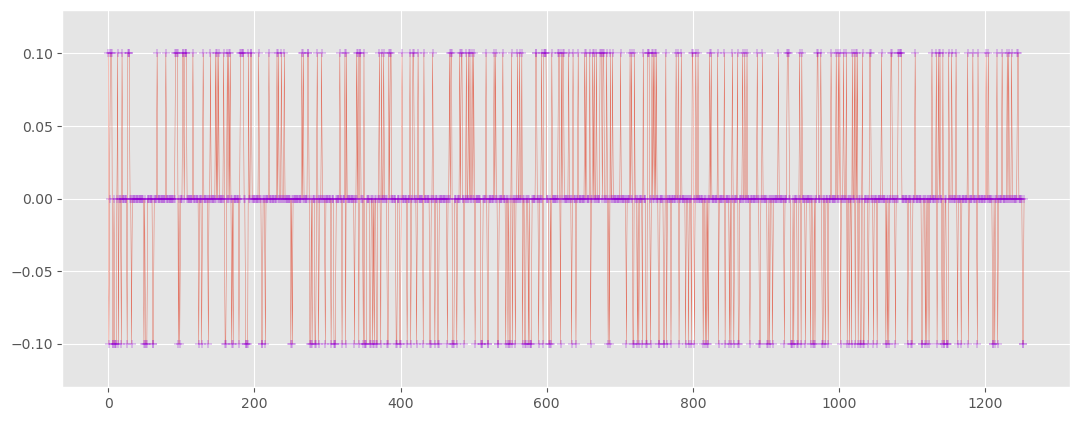

In [167]:
fig = plt.figure(figsize=(13,5), dpi=100)
ax = fig.gca()

ax.plot(range(0,len(data)), data['error'], linewidth=0.25, markeredgewidth=0.3, marker='+', markeredgecolor='darkviolet')
ax.set_ylim(-0.13,0.13)

In [169]:
data.head()

,Cancer Site,Sex,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Site bin,sum cost,error
0,AllSites,0,1,0.00,124565.6,40463.5,46642.8,37459.2,0,124565.5,1.000000e-01
1,AllSites,0,0,0.00,122420.8,38552.7,46671.9,37196.3,0,122420.9,-1.000000e-01
2,AllSites,0,3,0.00,125397.7,40463.5,47136.3,37797.9,0,125397.7,-1.455192e-11
3,AllSites,0,2,0.00,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01
4,AllSites,0,2,0.02,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01


In [219]:
dta = data.loc[:,['Site bin', 'Sex', 'Incidence and Survival Assumptions', 'Total Costs']]

dta.head(3)

,Site bin,Sex,Incidence and Survival Assumptions,Total Costs
0,0,0,1,124565.6
1,0,0,0,122420.8
2,0,0,3,125397.7


In [177]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components=1)

In [252]:
vec = pca.fit_transform(dta)

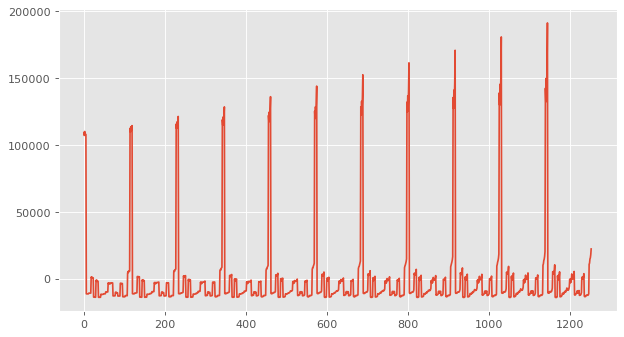

In [253]:
fig = plt.figure(figsize=(9,5), dpi=80)
ax = fig.gca()

ax.plot(range(len(vec)), vec)

<AxesSubplot:>

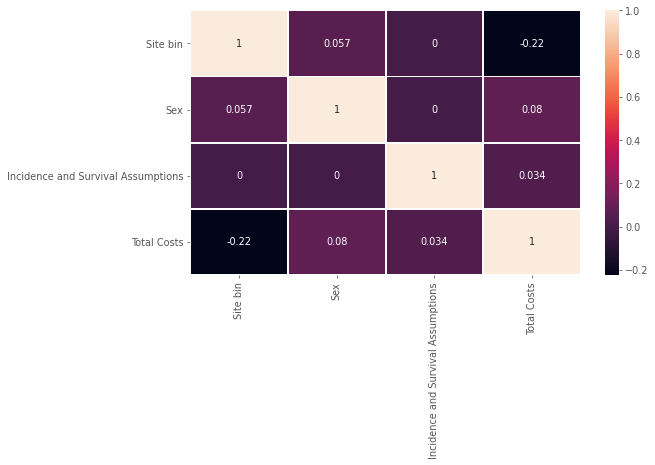

In [220]:
fig = plt.figure(figsize=(9,5), dpi=70)
ax = fig.gca()

sns.heatmap(dta.corr('spearman'), annot=True, linewidths=1, square=False, mask=False, ax=ax)

In [97]:
import pingouin as pg

In [198]:
sig_corr = pg.pairwise_corr(data, method='spearman')[['X', 'Y', 'r', 'p-unc']]
sig_corr[sig_corr['p-unc'] <= 0.05][sig_corr['X']=='Total Costs']

,X,Y,r,p-unc
24,Total Costs,Initial Year After Diagnosis Cost,0.867709,0.000000e+00
25,Total Costs,Continuing Phase Cost,0.922003,0.000000e+00
26,Total Costs,Last Year of Life Cost,0.907055,0.000000e+00
27,Total Costs,Site bin,-0.222199,1.715303e-15
28,Total Costs,sum cost,1.000000,0.000000e+00


In [201]:
data.head()

,Cancer Site,Sex,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Site bin,sum cost,error
0,AllSites,0,1,0.00,124565.6,40463.5,46642.8,37459.2,0,124565.5,1.000000e-01
1,AllSites,0,0,0.00,122420.8,38552.7,46671.9,37196.3,0,122420.9,-1.000000e-01
2,AllSites,0,3,0.00,125397.7,40463.5,47136.3,37797.9,0,125397.7,-1.455192e-11
3,AllSites,0,2,0.00,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01
4,AllSites,0,2,0.02,123236.3,38552.7,47155.7,37527.8,0,123236.2,1.000000e-01


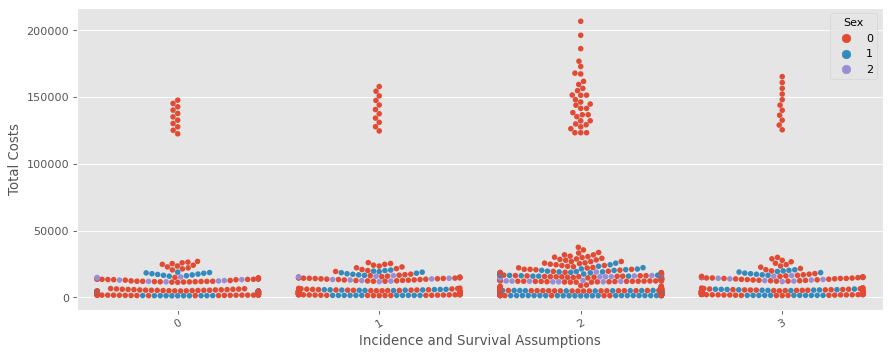

In [212]:
fig = plt.figure(figsize=(13,5), dpi=80)
ax = fig.gca()

sns.swarmplot(x='Incidence and Survival Assumptions', y='Total Costs', hue='Sex', data=data, ax=ax)
plt.xticks(rotation=30)
plt.show()

<BarContainer object of 1254 artists>

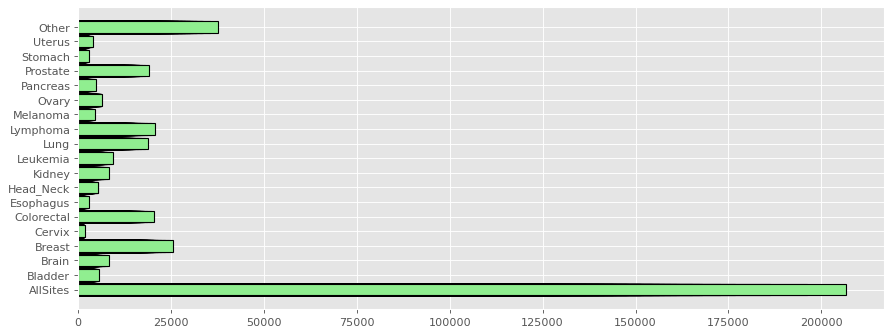

In [84]:
fig = plt.figure(figsize=(13,5), dpi=80)
ax = fig.gca()

ax.barh(data['Cancer Site'], data['Total Costs'], color='lightgreen', linewidth=1, edgecolor='black')

In [235]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [265]:
X_train.isna().sum()

Site bin                              0
Sex                                   0
Incidence and Survival Assumptions    0
dtype: int64

In [239]:
def error(model, X_, y_, cv):
    
    pred = mean_absolute_error(y_, model.predict(X_))
    
    cross = cross_val_score(model, X_, y_, scoring='neg_mean_absolute_error', cv=cv)
    
    print(f'\tMAE: {pred:.3f}\t\tCross: {cross}')

In [391]:
X_train, X_test, y_train, y_test = train_test_split(dta.iloc[:,:-1], dta.iloc[:,-1], test_size=0.3, shuffle=True)

In [284]:
np.arange(2,30)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [492]:
model = XGBRegressor(objective="reg:tweedie", booster='gbtree', n_estimators=50, reg_alpha=0.8, max_depth=4)
model.fit(X_train, y_train)

error(model, X_test, y_test, 3)

	MAE: 1559.344		Cross: [-1753.07050665 -1373.79556517 -1654.82519316]


In [493]:
error(model, X_train, y_train, cv=4)

	MAE: 1298.074		Cross: [-1072.97428367 -1446.24122521 -1450.80451192 -1562.89078542]


In [494]:
pred = model.predict(X_test)

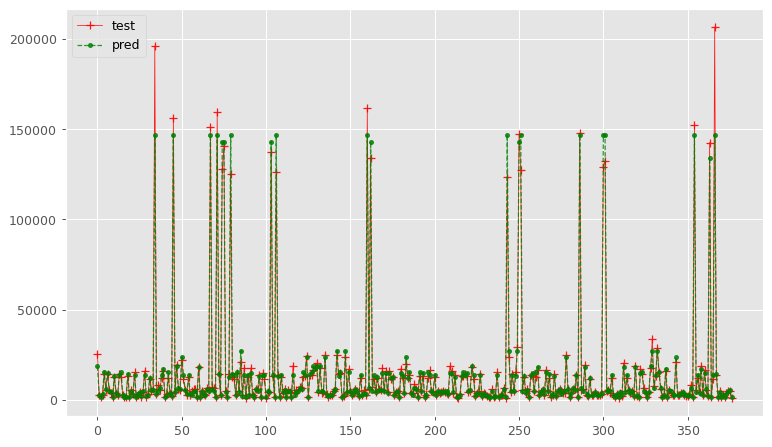

In [495]:
fig = plt.figure(figsize=(10,6), dpi=90)
ax = fig.gca()

ax.plot(range(len(y_test)),y_test, label='test', marker='+', c='red', alpha=0.9, linewidth=0.6)
ax.plot(range(len(y_test)), pred, label='pred', marker='.', c='green', alpha=0.8, linewidth=1, linestyle='--')
plt.legend()

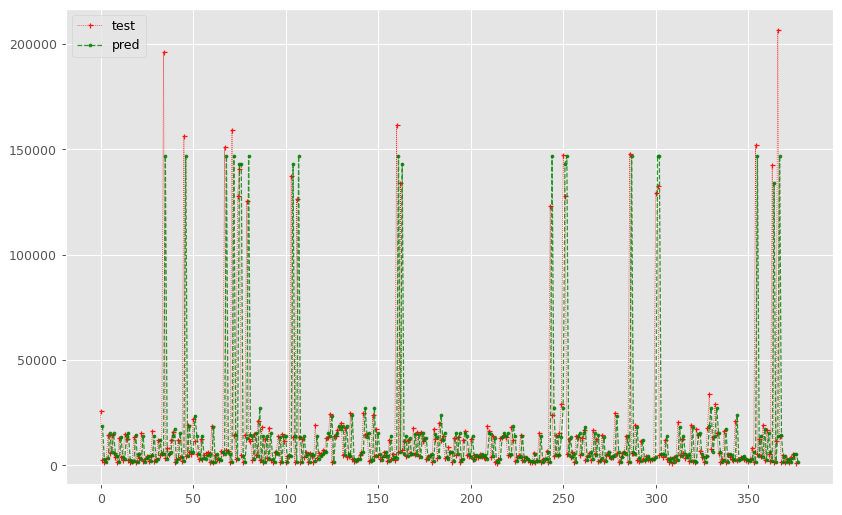

In [496]:
fig = plt.figure(figsize=(11,7), dpi=90)
ax = fig.gca()

ax.plot(range(len(y_test)),y_test, label='test', marker='+', c='red', alpha=0.9, linewidth=0.6, linestyle=':', markersize=4)
ax.plot(range(1,len(y_test)+1), pred, label='pred', marker='.', c='green', alpha=0.8, linewidth=1, linestyle='--', markersize=4)
plt.legend()

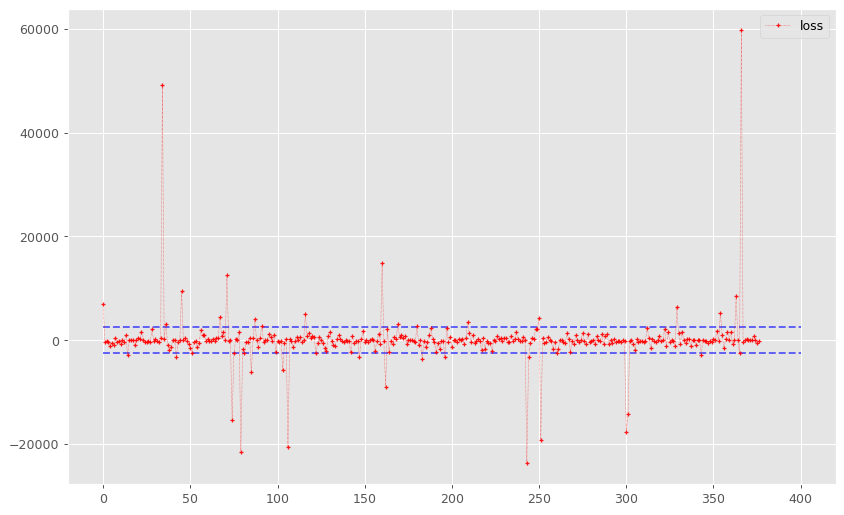

In [511]:
loss = y_test - pred

fig = plt.figure(figsize=(11,7), dpi=90)
ax = fig.gca()

ax.plot(range(len(loss)),loss , label='loss', marker='+', c='red', alpha=0.9, linewidth=0.4, linestyle=':', markersize=3)
ax.hlines(2500, xmin=0, xmax=400, color='blue', alpha=0.6,linestyles='dashed')
ax.hlines(-2500, xmin=0, xmax=400, color='blue', alpha=0.6,linestyles='dashed')
plt.legend()

In [518]:
error

<function __main__.error(model, X_, y_, cv)>

In [522]:
index = [i for i, j in enumerate(loss) if (j>=2500 or j<=-2500)]
len(index)

41

In [549]:
X_test.columns

Index(['Site bin', 'Sex', 'Incidence and Survival Assumptions'], dtype='object')

In [554]:
X_loss = X_test.iloc[index,:]

In [559]:
y_loss = y_test[index, np.newaxis][:,0]

In [567]:
X_loss['Site bin'].value_counts()

0     19
13     6
11     5
10     4
5      4
16     1
8      1
3      1
Name: Site bin, dtype: int64

In [565]:
cancer = {j:i for i, j in enumerate(['AllSites', 'Bladder', 'Brain', 'Breast', 'Cervix', 'Colorectal',
       'Esophagus', 'Head_Neck', 'Kidney', 'Leukemia', 'Lung', 'Lymphoma',
       'Melanoma', 'Other', 'Ovary', 'Pancreas', 'Prostate', 'Stomach',
       'Uterus'])}
cancer

{'AllSites': 0,
 'Bladder': 1,
 'Brain': 2,
 'Breast': 3,
 'Cervix': 4,
 'Colorectal': 5,
 'Esophagus': 6,
 'Head_Neck': 7,
 'Kidney': 8,
 'Leukemia': 9,
 'Lung': 10,
 'Lymphoma': 11,
 'Melanoma': 12,
 'Other': 13,
 'Ovary': 14,
 'Pancreas': 15,
 'Prostate': 16,
 'Stomach': 17,
 'Uterus': 18}